# setting

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time

In [2]:
import pandas as pd

In [3]:
from selenium.common.exceptions import NoSuchElementException

In [4]:
# 년월일 순서로 (ex. 20200501)
# type -> str
start_date = '20200501'
end_date = '20200531'

In [5]:
# 해당 기사의 주소 리스트
url_list = []

In [6]:
# driver = webdriver.Chrome('c:/kiwi/webdriver/chromedriver')
driver = webdriver.Chrome('C:\\Users\\g8428\\workspace\\chromedriver.exe')

C:\Users\g8428\AppData\Local\Temp/ipykernel_16628/2137940440.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:\\Users\\g8428\\workspace\\chromedriver.exe')


## 언론사 선택

In [53]:
# 조선일보(1023) 중앙일보(1025) 동아일보(1020) 매경(1009)
paper = 1023

# 크롤링

## 기사 URL 읽어오기

In [54]:
num = 1
while True:
    driver.get(f'https://search.naver.com/search.naver?where=news&query=%EC%A7%80%EC%97%AD%ED%99%94%ED%8F%90&sm=tab_opt&sort=0&photo=0&field=0&pd=3&ds={start_date[0:4]}.{start_date[4:6]}.{start_date[6:]}&de={end_date[0:4]}.{end_date[4:6]}.{end_date[6:]}&docid=&related=0&mynews=1&office_type=1&office_section_code=1&news_office_checked={paper}&nso=so%3Ar%2Cp%3Afrom{start_date}to{end_date},a:all&start={num}')
    time.sleep(3)
    
    try:
        ul = driver.find_element(By.CSS_SELECTOR, '#main_pack > section > div > div.group_news > ul')
    except NoSuchElementException:
        print("Not exist paper")
        break
    lis = ul.find_elements_by_tag_name("li")
    
    check = False
    
    for li in lis:
        tmp = li.get_attribute('id')
        tmp_url = driver.find_element(By.CSS_SELECTOR, f'#{tmp} > div > div > a').get_attribute("href")
        if tmp_url in url_list:
            check = True
            break
        url_list.append(tmp_url)
        
    if check:
        break
        
    num += 10

In [55]:
url_list

['https://news.chosun.com/site/data/html_dir/2020/05/18/2020051803214.html?utm_source=naver&utm_medium=original&utm_campaign=news',
 'https://news.chosun.com/site/data/html_dir/2020/05/13/2020051302885.html?utm_source=naver&utm_medium=original&utm_campaign=news',
 'https://news.chosun.com/site/data/html_dir/2020/05/07/2020050703964.html?utm_source=naver&utm_medium=original&utm_campaign=news',
 'https://news.chosun.com/site/data/html_dir/2020/05/06/2020050600538.html?utm_source=naver&utm_medium=original&utm_campaign=news',
 'https://news.chosun.com/site/data/html_dir/2020/05/26/2020052601413.html?utm_source=naver&utm_medium=original&utm_campaign=news',
 'https://news.chosun.com/site/data/html_dir/2020/05/23/2020052300351.html?utm_source=naver&utm_medium=original&utm_campaign=news',
 'https://news.chosun.com/site/data/html_dir/2020/05/07/2020050700254.html?utm_source=naver&utm_medium=original&utm_campaign=news',
 'https://news.chosun.com/site/data/html_dir/2020/05/11/2020051101445.html?u

## URL의 기사 내용 받아오기

### 조선일보

In [56]:
new_text=[]
number=-1
for url in url_list:
    try:
        driver.get(url)
        time.sleep(1)
    
        title = driver.find_element_by_xpath('//*[@id="fusion-app"]/div[1]/div[2]/div/div/div[3]/h1/span').text
        content = driver.find_element_by_xpath('//*[@id="fusion-app"]/div[1]/div[2]/div/section/article/section').text
        number += 1

        news = f'{title}\n\n{content}'
        new_text.append(news)
    except NoSuchElementException:
        print("No more news")
        break

C:\Users\g8428\AppData\Local\Temp/ipykernel_11372/3538703698.py:8: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  title = driver.find_element_by_xpath('//*[@id="fusion-app"]/div[1]/div[2]/div/div/div[3]/h1/span').text
C:\Users\g8428\AppData\Local\Temp/ipykernel_11372/3538703698.py:9: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  content = driver.find_element_by_xpath('//*[@id="fusion-app"]/div[1]/div[2]/div/section/article/section').text


No more news


In [57]:
import pickle

with open('news_code_1023.pkl','wb') as file:
    pickle.dump(new_text,file)

In [14]:
import pickle

with open('news_code_1023.pkl','rb') as file:
    data = pickle.load(file)
    print(data)

['코로나 덕분...충남도 올해 지역화폐 1232억원 발행\n\n충남 계룡시 지역화폐\n코로나 사태로 인해 충남도의 지역화폐 발행이 크게 늘어났다.\n18일 충남도에 따르면 올해 1월부터 4월까지 충남 15개 시·군은 1232억원의 지역화폐를 발행했다. 이는 지난 한 해 473억원의 2.6배에 달하는 규모다.\n충남도 관계자는 “올해부터 본격적으로 지역화폐를 홍보하면서 발행규모가 늘었다”면서 “여기에 코로나 관련 지원금을 지역화폐로 제공하는 경우가 있어 발행액이 폭발적으로 증가했다”고 말했다.\n지난달까지 발행된 지역화폐 가운데 판매된 금액은 961억원이며 이 가운데 589억원이 그동안 실제 결제에 사용됐다. 지역화폐는 지역에서 발행하고, 지역에서만 사용할 수 있는 상품권이나 코인 등 결제수단을 말한다. 사용처를 지역내 소상공인 업체를 대상으로 제한하기 때문에 돈이 지역경제에 풀리는 효과가 있다.\n올해 충남도가 계획한 지역화폐 발행액은 3329억2000만원이다. 현재 추세라면 올해 연말까지 충남지역 지역화폐 발행액은 3300억원을 넘어설 것으로 전망된다.\n충남연구원은 당초 충남도가 계획한 올해 지역화폐 발행액을 기준으로 분석한 결과 1조4000억원의 지역 경제 파급효과를 거둘 것으로 전망했다. 생산 유발효과는 2156억원, 부가가치 유발효과는 1031억원, 소비촉진 효과는 665억원, 가계 수입 증대효과는 160억원 등이다. 이로 인한 고용 유발 효과는 2636명으로 분석했다.\n충남에서 지역화폐를 사용할 수 있는 가맹 업소는 7만4334곳으로 전체 대상 업소 9만6095곳 중 77%가 가입했다. 충남도 관꼐자는 “지역화폐가 코로나로 위축된 지역 경제에 윤활유와 같은 역할을 할 것으로 기대하고 있다”고 말했다.', "대전 지역화폐 '온통대전' 14일 출시된다\n\n대전시의 지역화폐인 ‘온통대전(On通대전)’이 14일 출시된다.\n오는 14일 출시되는 대전시_지역화폐 '온통대전'\n대전시는 ‘모두에게 통용되는 큰 돈이자 소통의 매개체’라는 뜻을 담은 온통대전

In [18]:
all_text=''
for news in new_text:
    all_text+=news

all_text

'코로나 덕분...충남도 올해 지역화폐 1232억원 발행\n\n충남 계룡시 지역화폐\n코로나 사태로 인해 충남도의 지역화폐 발행이 크게 늘어났다.\n18일 충남도에 따르면 올해 1월부터 4월까지 충남 15개 시·군은 1232억원의 지역화폐를 발행했다. 이는 지난 한 해 473억원의 2.6배에 달하는 규모다.\n충남도 관계자는 “올해부터 본격적으로 지역화폐를 홍보하면서 발행규모가 늘었다”면서 “여기에 코로나 관련 지원금을 지역화폐로 제공하는 경우가 있어 발행액이 폭발적으로 증가했다”고 말했다.\n지난달까지 발행된 지역화폐 가운데 판매된 금액은 961억원이며 이 가운데 589억원이 그동안 실제 결제에 사용됐다. 지역화폐는 지역에서 발행하고, 지역에서만 사용할 수 있는 상품권이나 코인 등 결제수단을 말한다. 사용처를 지역내 소상공인 업체를 대상으로 제한하기 때문에 돈이 지역경제에 풀리는 효과가 있다.\n올해 충남도가 계획한 지역화폐 발행액은 3329억2000만원이다. 현재 추세라면 올해 연말까지 충남지역 지역화폐 발행액은 3300억원을 넘어설 것으로 전망된다.\n충남연구원은 당초 충남도가 계획한 올해 지역화폐 발행액을 기준으로 분석한 결과 1조4000억원의 지역 경제 파급효과를 거둘 것으로 전망했다. 생산 유발효과는 2156억원, 부가가치 유발효과는 1031억원, 소비촉진 효과는 665억원, 가계 수입 증대효과는 160억원 등이다. 이로 인한 고용 유발 효과는 2636명으로 분석했다.\n충남에서 지역화폐를 사용할 수 있는 가맹 업소는 7만4334곳으로 전체 대상 업소 9만6095곳 중 77%가 가입했다. 충남도 관꼐자는 “지역화폐가 코로나로 위축된 지역 경제에 윤활유와 같은 역할을 할 것으로 기대하고 있다”고 말했다.대전 지역화폐 \'온통대전\' 14일 출시된다\n\n대전시의 지역화폐인 ‘온통대전(On通대전)’이 14일 출시된다.\n오는 14일 출시되는 대전시_지역화폐 \'온통대전\'\n대전시는 ‘모두에게 통용되는 큰 돈이자 소통의 매개체’라는 뜻을 담은 온통대전을

텍스트 손질

In [54]:
import re

In [71]:
a = re.findall('[ㄱ-ㅎ가-힣]{3,}',all_text)
b=''
for i in a:
    b += i+' '


'코로나 충남도 지역화폐 계룡시 지역화폐 코로나 사태로 충남도의 지역화폐 발행이 늘어났다 충남도에 따르면 월부터 월까지 억원의 지역화폐를 발행했다 억원의 달하는 규모다 충남도 관계자는 올해부터 본격적으로 지역화폐를 홍보하면서 발행규모가 늘었다 여기에 코로나 지원금을 지역화폐로 제공하는 경우가 발행액이 폭발적으로 증가했다 말했다 지난달까지 발행된 지역화폐 가운데 판매된 금액은 억원이며 가운데 억원이 그동안 결제에 사용됐다 지역화폐는 지역에서 발행하고 지역에서만 사용할 상품권이나 결제수단을 말한다 사용처를 지역내 소상공인 업체를 대상으로 제한하기 때문에 지역경제에 풀리는 효과가 충남도가 계획한 지역화폐 발행액은 만원이다 추세라면 연말까지 충남지역 지역화폐 발행액은 억원을 넘어설 것으로 전망된다 충남연구원은 충남도가 계획한 지역화폐 발행액을 기준으로 분석한 억원의 파급효과를 것으로 전망했다 유발효과는 부가가치 유발효과는 소비촉진 효과는 증대효과는 등이다 효과는 명으로 분석했다 충남에서 지역화폐를 사용할 업소는 곳으로 가입했다 충남도 관꼐자는 지역화폐가 코로나로 위축된 경제에 윤활유와 역할을 것으로 기대하고 말했다 지역화폐 온통대전 출시된다 대전시의 지역화폐인 온통대전 출시된다 출시되는 대전시 지역화폐 온통대전 대전시는 모두에게 통용되는 돈이자 소통의 매개체 온통대전을 규모로 발행한다고 밝혔다 규모를 억원으로 정했다가 코로나 확산으로 경영난을 소상공인을 발행규모를 늘렸다 시기도 월에서 앞당겼다 신청은 스마트폰 온통대전 내려받아 회원으로 가입하거나 카드를 신청하면 이용해 모바일 방식으로 만원까지 충전해 사용할 스마트폰이 고령층 사회적 배려자를 하나은행 영업소에서도 카드를 발급한다 사용하면 코로나와 관련한 경제활력 지원금 포함해 캐시백을 받는다 이상이면 누구나 온통대전을 발급받을 연회비와 재발급 수수료가 소득공제를 국가정책에 월까지 사용한 경우에 대해선 소득공제도 지역화폐는 발행일부터 대전에서만 백화점과 대형마트 유흥업소 지역에 본사가 직영점 온라인 제외한 신용카드 단말

### 워드클라우드 생성

In [60]:
!pip install wordcloud

  Running setup.py clean for wordcloud
Failed to build wordcloud
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\g8428\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\g8428\\AppData\\Local\\Temp\\pip-install-oojv646w\\wordcloud_aca6cd27049c428e85185148907a31e7\\setup.py'"'"'; __file__='"'"'C:\\Users\\g8428\\AppData\\Local\\Temp\\pip-install-oojv646w\\wordcloud_aca6cd27049c428e85185148907a31e7\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\g8428\AppData\Local\Temp\pip-wheel-odlxyh3x'
       cwd: C:\Users\g8428\AppData\Local\Temp\pip-install-oojv646w\wordcloud_aca6cd27049c428e85185148907a31e7\
  Complete output (20 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9

##### 오류 뜰 경우 1.8.1.-cp39~~~ .whl 버전 찾아서 workspace에 옮기고 경로지정해서 설치

In [ ]:
# pip install C:\\Users\\g8428\\workspace\\wordcloud-1.8.1-cp39-cp39-win_amd64.whl

In [51]:
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud

##### 한글폰트 추가

In [72]:
wordcloud = WordCloud(font_path='malgun',collocations=False).generate(b)

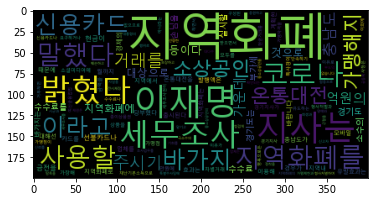

In [73]:
plt.imshow(wordcloud)